<a href="https://colab.research.google.com/github/siva5271/AirFIn-tech-task1/blob/dependabot%2Fbundler%2Fdev%2Fci%2Fmac%2Fcocoapods-1.12.0/image_caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import string
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.data import Dataset
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from tqdm import tqdm

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
image_path='/content/drive/MyDrive/datasets/flickr30k_images'
result_path='/content/drive/MyDrive/datasets/flickr30k_images/results.csv'

In [33]:
image_dir=Path(image_path)
image_dir

PosixPath('/content/drive/MyDrive/datasets/flickr30k_images')

In [34]:
image_count=len(list(image_dir.glob('*.jpg')))
image_count

31215

In [35]:
available_images=list(image_dir.glob('*.jpg'))
available_images_stringified=[str(x) for x in available_images]
available_images_names=[x.split('/')[-1] for x in available_images_stringified]
len(available_images_names)

31215

In [36]:
df=pd.read_csv(result_path,on_bad_lines='skip')
df

,image_name| comment_number| comment
0,1000092795.jpg| 0| Two young guys with shaggy ...
1,1000092795.jpg| 2| Two men in green shirts are...
2,1000092795.jpg| 3| A man in a blue shirt stand...
3,1000092795.jpg| 4| Two friends enjoy time spen...
4,10002456.jpg| 0| Several men in hard hats are ...
...,...
141846,99804383.jpg| 2| A older Asian man is playing ...
141847,99804383.jpg| 3| An elderly man sits outside a...
141848,99804383.jpg| 4| An elderly gentleman playing ...
141849,998845445.jpg| 2| A man is leaning off of the ...


In [37]:
df['image_name']=df['image_name| comment_number| comment'].map(lambda x: \
        str(x).split('|')[0])
df['comment_number']=df['image_name| comment_number| comment'].map(\
                    lambda x: str(x).split('|')[1])
df['comment']=df['image_name| comment_number| comment'].map(lambda x: \
                str(x).split('|')[-1])
df


,image_name| comment_number| comment,image_name,comment_number,comment
0,1000092795.jpg| 0| Two young guys with shaggy ...,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg| 2| Two men in green shirts are...,1000092795.jpg,2,Two men in green shirts are standing in a yard .
2,1000092795.jpg| 3| A man in a blue shirt stand...,1000092795.jpg,3,A man in a blue shirt standing in a garden .
3,1000092795.jpg| 4| Two friends enjoy time spen...,1000092795.jpg,4,Two friends enjoy time spent together .
4,10002456.jpg| 0| Several men in hard hats are ...,10002456.jpg,0,Several men in hard hats are operating a gian...
...,...,...,...,...
141846,99804383.jpg| 2| A older Asian man is playing ...,99804383.jpg,2,A older Asian man is playing an instrument in...
141847,99804383.jpg| 3| An elderly man sits outside a...,99804383.jpg,3,An elderly man sits outside a storefront acco...
141848,99804383.jpg| 4| An elderly gentleman playing ...,99804383.jpg,4,An elderly gentleman playing a musical instru...
141849,998845445.jpg| 2| A man is leaning off of the ...,998845445.jpg,2,A man is leaning off of the side of a blue an...


In [38]:
df_splitted=df.drop(columns=['image_name| comment_number| comment'])
df_splitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141851 entries, 0 to 141850
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_name      141851 non-null  object
 1   comment_number  141851 non-null  object
 2   comment         141851 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [39]:
df_available=df_splitted[df_splitted['image_name'].isin(available_images_names)]
df_available.reset_index(inplace=True,drop=True)
df_available

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,2,Two men in green shirts are standing in a yard .
2,1000092795.jpg,3,A man in a blue shirt standing in a garden .
3,1000092795.jpg,4,Two friends enjoy time spent together .
4,10002456.jpg,0,Several men in hard hats are operating a gian...
...,...,...,...
138321,8001609110.jpg,4,An old man playing a musical instrument at a ...
138322,800173989.jpg,0,Six men are sitting in a small boat in the wa...
138323,800173989.jpg,2,Six men relax in the blue Bella Rose boat whi...
138324,800173989.jpg,3,Six men in a large canoe-type boat on calm wa...


In [40]:
npic=5
npix=180
target_size=(npix,npix,3)
count=1

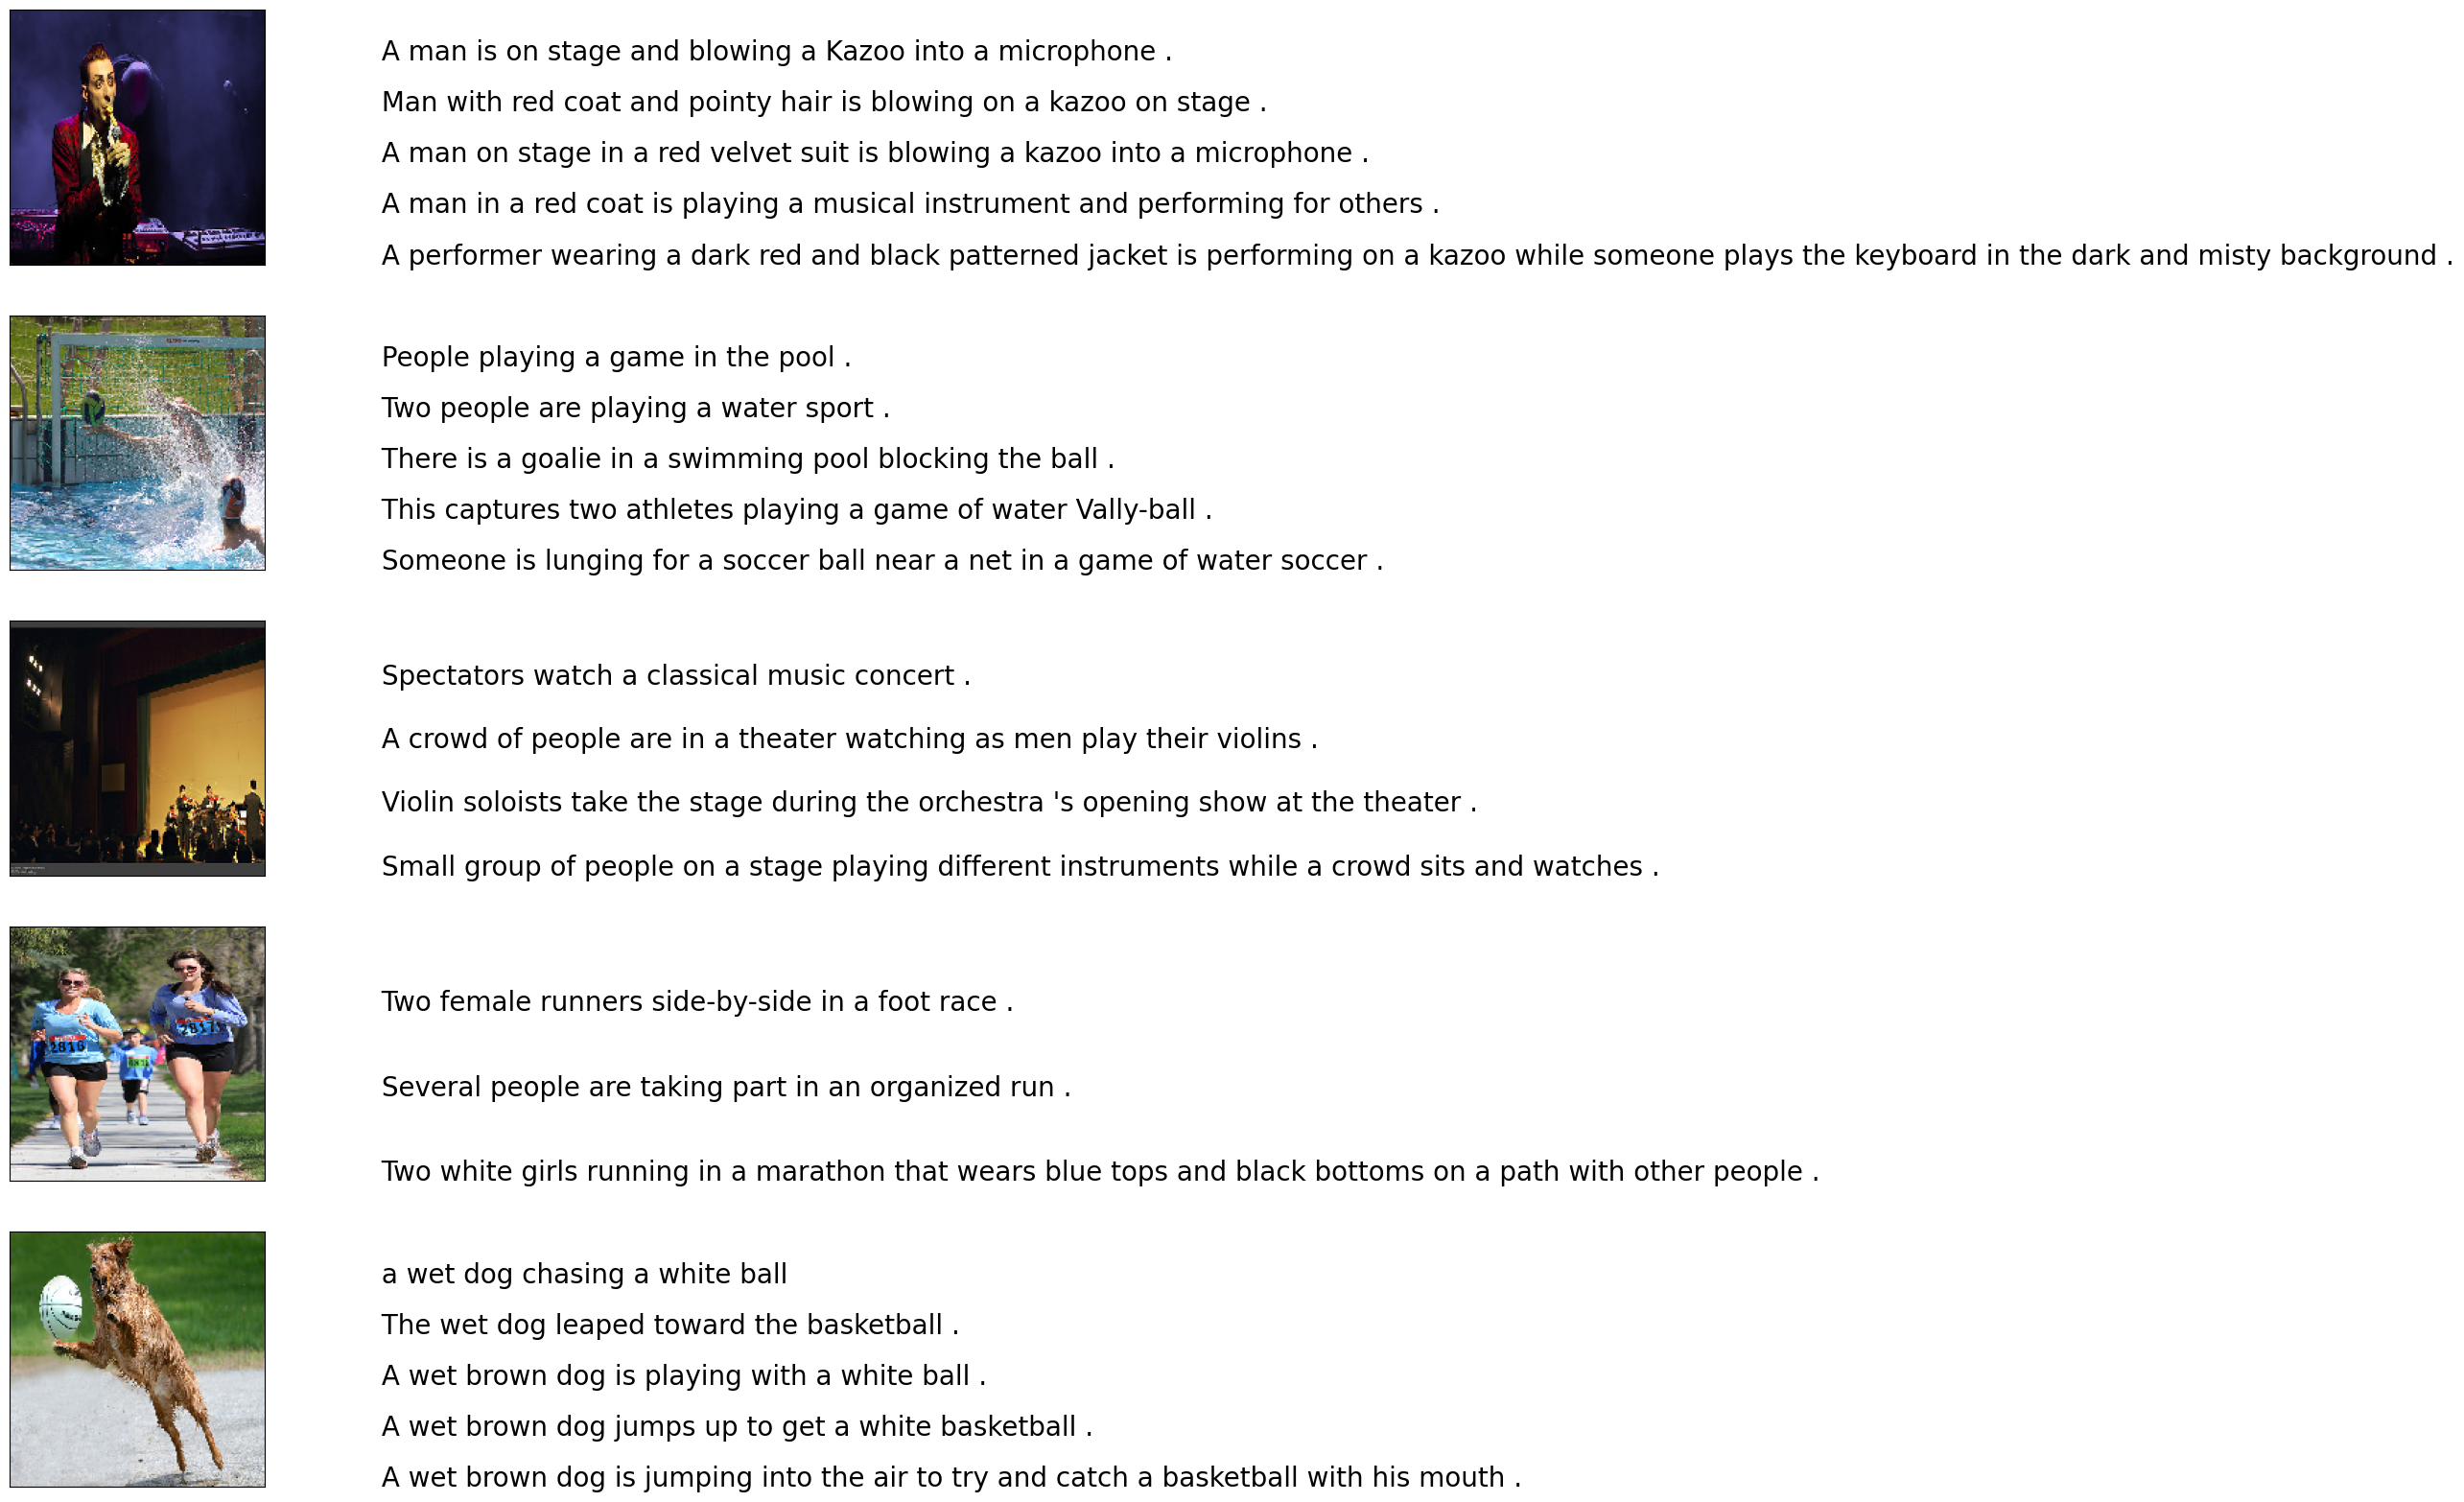

In [41]:
fig=plt.figure(figsize=(10,20))
for jpgfnm in available_images_names[:5]:
  filename=image_path+'/'+jpgfnm
  captions=list(df_available['comment'].loc[df_available['image_name']==\
            jpgfnm].values)
  image_load=load_img(filename,target_size=target_size)
  ax=fig.add_subplot(npic,2,count,xticks=[],yticks=[])
  ax.imshow(image_load)
  count+=1

  ax=fig.add_subplot(npic,2,count)
  plt.axis('off')
  ax.set_xlim(0,1)
  ax.set_ylim(0,len(captions))
  for i,caption in enumerate(captions):
    ax.text(0,i,caption,fontsize=20)
  count+=1
plt.show()

In [42]:
vocabulary=[]
for txt in df_available['comment']:
  vocabulary.extend(txt.split())
len(set(vocabulary))

21130

In [43]:
def remove_punctuation(sentence_with_punctuation):
  translator=str.maketrans('','',string.punctuation)
  sentence_without_punctuation=sentence_with_punctuation.translate(translator)
  return sentence_without_punctuation

In [44]:
def remove_single_character(text):
  formatted_text=''
  for word in text.split():
    if len(word)>1:
      formatted_text+=word+' '
  return formatted_text

In [45]:
def remove_numeric(text):
  result=''
  for word in text.split():
    if word.isalpha():
      result+=word+' '
  return result

In [46]:
def convert_to_lower(text):
  return text.lower()

In [47]:
def text_clean(text_original):
  result=remove_punctuation(text_original)
  result=remove_single_character(result)
  result=remove_numeric(result)
  result=convert_to_lower(result)
  return result

In [48]:
for i,caption in enumerate(df_available['comment'].values):
  new_caption=text_clean(caption)
  df_available['comment'].iloc[i]=new_caption

<ipython-input-48-56ec6341943a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_available['comment'].iloc[i]=new_caption


In [49]:
clean_vocabulary=[]
for txt in df_available['comment']:
  clean_vocabulary.extend(txt.split())
print(len(set(clean_vocabulary)))

17943


In [50]:
final_image_captions=[]
for caption in df_available['comment'].values:
  caption='<start> '+caption+' <end>'
  final_image_captions.append(caption)
final_image_captions

['<start> two young guys with shaggy hair look at their hands while hanging out in the yard  <end>',
 '<start> two men in green shirts are standing in yard  <end>',
 '<start> man in blue shirt standing in garden  <end>',
 '<start> two friends enjoy time spent together  <end>',
 '<start> several men in hard hats are operating giant pulley system  <end>',
 '<start> workers look down from up above on piece of equipment  <end>',
 '<start> two men working on machine wearing hard hats  <end>',
 '<start> four men on top of tall structure  <end>',
 '<start> three men on large rig  <end>',
 '<start> child in pink dress is climbing up set of stairs in an entry way  <end>',
 '<start> little girl in pink dress going into wooden cabin  <end>',
 '<start> little girl climbing the stairs to her playhouse  <end>',
 '<start> little girl climbing into wooden playhouse  <end>',
 '<start> girl going into wooden building  <end>',
 '<start> someone in blue shirt and hat is standing on stair and leaning again

In [51]:
final_image_names=[]
for i,image_name in enumerate(df_available['image_name'].values):
  final_image_names.append(image_path+'/'+image_name)
len(final_image_names)

138326

In [52]:
def data_limiter(num,total_captions,all_images):
  train_captions,selected_images=shuffle(total_captions,all_images,\
                    random_state=1)
  train_captions=train_captions[:num]
  selected_images=selected_images[:num]
  return train_captions,selected_images

In [53]:
#image we are gonna take 160 batches of 625 elements each
train_captions,img_names=data_limiter(100000,final_image_captions,final_image_names)

In [73]:
#all the images are gonna be resized to 180X180
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_jpeg(img,channels=3)
  #we are using the inception_v3 model to produce a vector space of the
  #since we aren't classifying, the softmax layer is not needed
  #the output of this layer will be 8x8x2048
  img=tf.image.convert_image_dtype(img,tf.float32)
  img=tf.keras.applications.inception_v3.preprocess_input(img)
  print(img.shape)
  return img,image_path
load_image('/content/drive/MyDrive/flickr30k_images/1000344755.jpg')

(333, 500, 3)


(<tf.Tensor: shape=(333, 500, 3), dtype=float32, numpy=
 array([[[-0.9967089 , -0.99483275, -0.9931411 ],
         [-0.99661666, -0.99489427, -0.9931411 ],
         [-0.99661666, -0.994925  , -0.9931719 ],
         ...,
         [-0.994802  , -0.99483275, -0.99440217],
         [-0.9963706 , -0.9964321 , -0.9960938 ],
         [-0.9990465 , -0.999108  , -0.99907726]],
 
        [[-0.9964321 , -0.994925  , -0.99311036],
         [-0.9965859 , -0.99498653, -0.9932026 ],
         [-0.9966782 , -0.9949558 , -0.9932026 ],
         ...,
         [-0.99830836, -0.99830836, -0.99830836],
         [-0.9995079 , -0.99953866, -0.9996617 ],
         [-0.9965244 , -0.9966782 , -0.99655515]],
 
        [[-0.9965244 , -0.994925  , -0.9931411 ],
         [-0.99655515, -0.9949558 , -0.9931719 ],
         [-0.9965244 , -0.994925  , -0.9931411 ],
         ...,
         [-0.99818534, -0.99846214, -0.9983699 ],
         [-0.994925  , -0.9952326 , -0.99498653],
         [-0.9945867 , -0.99489427, -0.9945559

In [77]:
#here we are downloading the InceptionV3 model which is pretrained on the
#imagenet dataset
image_model=tf.keras.applications.InceptionV3(include_top=False,\
            weights='imagenet')
#we are gonna take the input layer of the imagenet model
new_input=image_model.input
print(new_input.shape)
#here we are gonna take the output last layer of the imagenet model
hidden_layer=image_model.layers[-1].output
print(new_input.shape)
#here we are making a custom model with the input layer of the image model
#and the output tensor of the last layer of the imagenet model
image_features_extract_model=tf.keras.Model(new_input,hidden_layer)

(None, None, None, 3)
(None, None, None, 3)


In [79]:
encode_train=sorted(set(img_names))
#here we are converting the data set into a tf.Dataset type
image_dataset=tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset=image_dataset.map(load_image,\
              num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

(None, None, 3)


In [80]:
for img,path in tqdm(image_dataset):
  batch_features=image_features_extract_model(img)
  new_shape=(batch_features.shape[0],-1,batch_features.shape[3])
  batch_features=tf.reshape(batch_features,new_shape)

  0%|          | 0/481 [00:00<?, ?it/s]


InvalidArgumentError: ignored